# Laptop Price Prediction model

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#opening the file
df = pd.read_csv('/laptop_data.csv')

##Feature scaling , Eda and Data preprocessing

In [3]:
#reading the data till 1st 5 indx and Getting the total columns to know info we have to deal with
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
#to know the missing idx of columns and their datatype
# Also,crosschecking for missing values and their total in a column
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [6]:

#changing the unnamed columns to null(basically removing them)
df.drop_duplicates()
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
#replacing the strgs to change them with float and integers
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
#SyntAxing --> df['Column_name']=df['Column_name'].str.replace('Word_to_be_replace/removed','')

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
#changing the datatype from obj to int and float
#Syntaxing --> df['Column_name']=df['Column_name'].astype('int')
df['Ram']=df['Ram'].astype('float32')
df['Weight']=df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float32
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(2), float64(2), object(7)
memory usage: 101.9+ KB


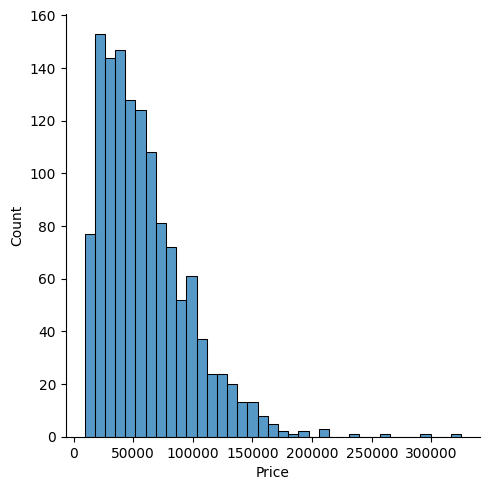

In [10]:
#for (price) column to know the commodity and premiums in dataset
sns.displot(df['Price'])

<Axes: xlabel='Company'>

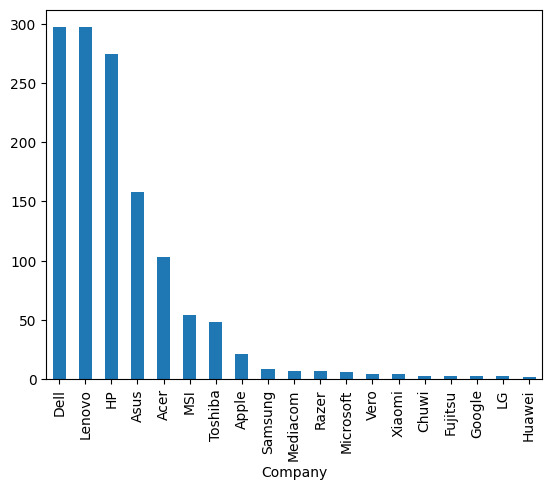

In [11]:
#for (company) column to know the top grossing or tabletop laptop sellers
df['Company'].value_counts().plot(kind='bar')

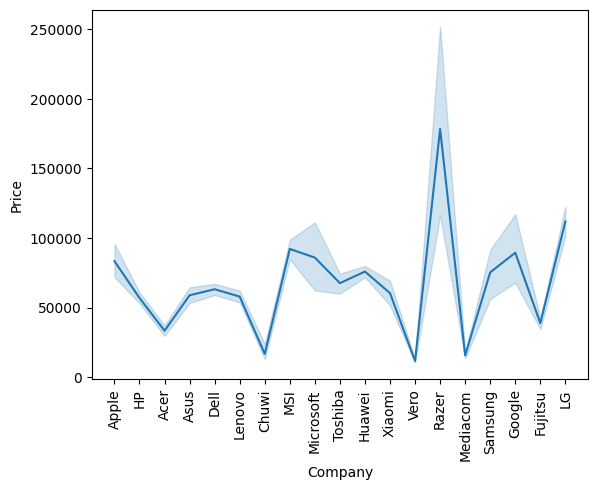

In [12]:
#ploting graph to know the price variation of laptop wrt companies
sns.lineplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


<Axes: ylabel='TypeName'>

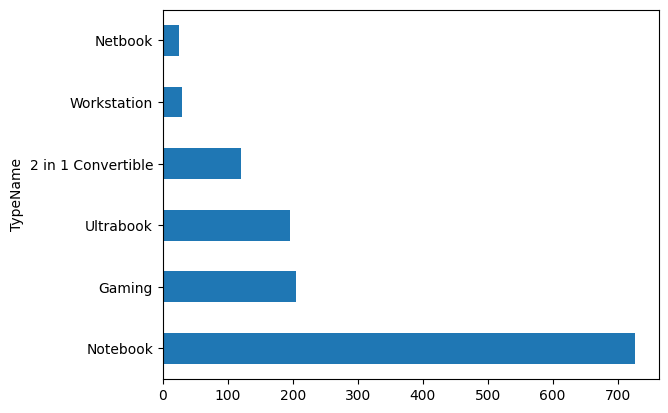

In [13]:
#analyzing the type of laptops to find most occurred ones
df['TypeName'].value_counts().plot(kind='barh')

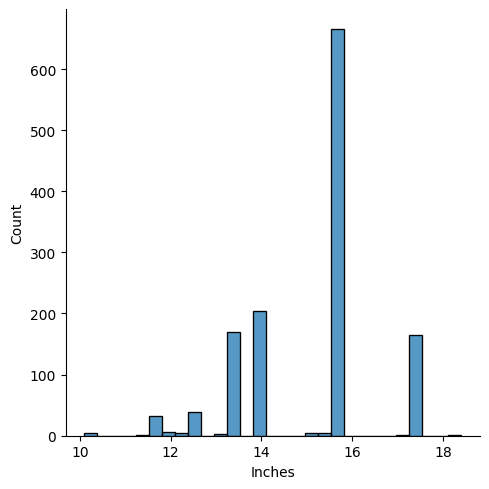

In [14]:
sns.displot(df['Inches'])

In [15]:
#analyZing the screen resolutions column and making a newcolumn touch
df['ScreenResolution'].value_counts()
df['Touch']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float32
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touch             1303 non-null   int64  
dtypes: float32(2), float64(2), int64(1), object(7)
memory usage: 112.1+ KB


<Axes: xlabel='Touch', ylabel='Price'>

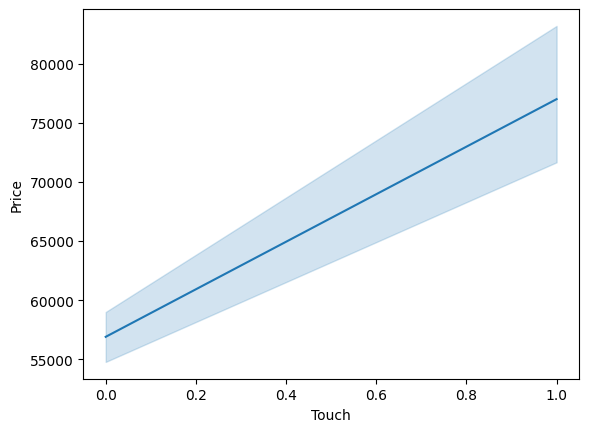

In [16]:
#price variation as per touch input
sns.lineplot(x=df['Touch'],y=df['Price'])

<Axes: xlabel='Ips', ylabel='Price'>

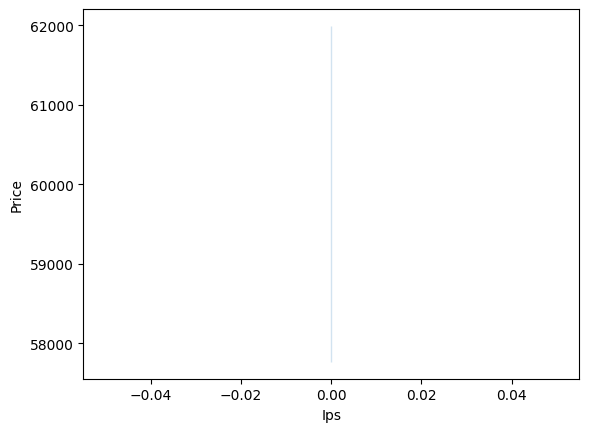

In [17]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'Ips' in x else 0)
sns.lineplot(x=df['Ips'],y=df['Price'])
#there is direct relation b/w ips screen and touch input

In [18]:
#extracting resolution of screen in x * y form
Display=df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X']=Display[0]
df['Y']=Display[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,X,Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,IPS Panel Retina Display 2560,1600


In [19]:
#correcting the X and changing obj to int for both Y and X
df['X']=df['X'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['X']=df['X'].astype('int')
df['Y']=df['Y'].astype('int')
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,X,Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,2560,1600


In [20]:
# Select only numerical features for correlation
numerical_features = df.select_dtypes(include=np.number)
# Now it is accessible to get the correlation with 'Price':
price_correlation = numerical_features.corr()['Price']
print(price_correlation)

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Touch     0.191226
Ips            NaN
X         0.556529
Y         0.552809
Name: Price, dtype: float64


In [21]:
#making new column Pixels out of x,y
df['Pixels']=(((df['X'])**2)*((df['Y'])**2)**0.5/df['Inches']).astype('float32')

In [22]:
#dropping the useless columns
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Inches','X','Y'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0


In [23]:
#analyzing Cpu and splining it till 1st 3 idx
df['Cpu'].value_counts()
df['Cpus']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpus
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5


In [24]:
#function processor to fetch only 3 words and applying it to cpu_name
def processor(text):
    if text == 'Intel Core I7' or 'Intel Core I5' or 'Intel Core I3':
        return text
    else :
        if text == 'Intel':
            return 'Intel series'
        else:
            return 'AMD Processors'
df['Cpus'].apply(processor)

,Cpus
0,Intel Core i5
1,Intel Core i5
2,Intel Core i5
3,Intel Core i7
4,Intel Core i5
...,...
1298,Intel Core i7
1299,Intel Core i7
1300,Intel Celeron Dual
1301,Intel Core i7


In [25]:
#making new column cpu_brand which duplicates the data in cpus also, droping cpu and cpu name
df['Cpu_Brand']=df['Cpus']
df.drop(columns=['Cpus','Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand
0,Apple,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5
1,Apple,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5
2,HP,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5
3,Apple,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7
4,Apple,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5


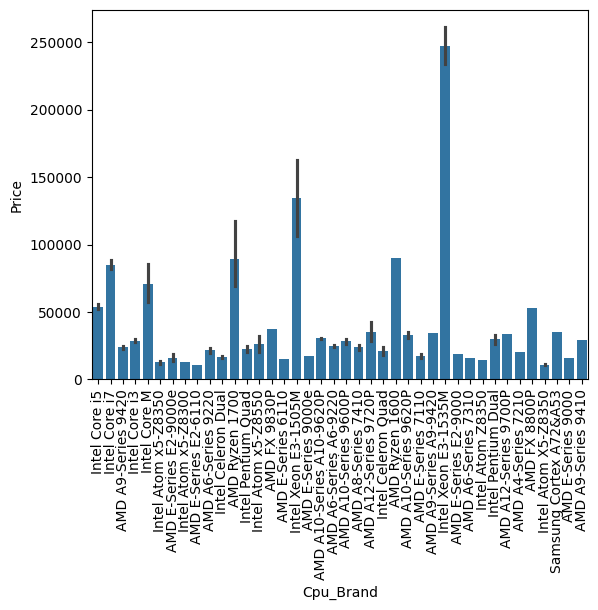

In [26]:
#checking variations in price wrt cpu ->
sns.barplot(x=df['Cpu_Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

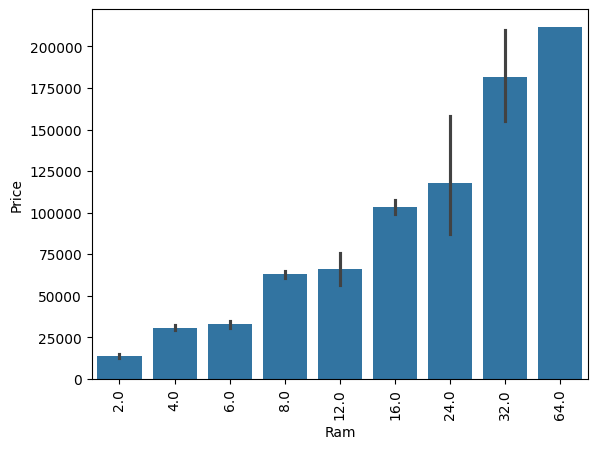

In [27]:
#Similarily, wrt ram->
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [28]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [29]:
# this expression will remove the decimal space for example 1.0 TB will be 1TB
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
# replacing GB word with " "
df['Memory'] = df['Memory'].str.replace('GB','')
# replacing TB with "000" in the end
df['Memory'] = df['Memory'].str.replace('TB','000')
# split the word accross the "+" character
newdata = df['Memory'].str.split("+",n = 1,expand = True)
newdata

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [30]:
#making a copy of memory
df['A'] = newdata[0]
df['A'] = df['A'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,A
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,128 SSD
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,128 Flash Storage
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,256 SSD
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,512 SSD
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,256 SSD


In [31]:
#making new columns hdd and ssd
def new_df(value):
    df['Memo'+value] = df['A'].apply(lambda x:1 if value in x else 0)
listofmemory = ['HDD','SSD']
for value in listofmemory:
    new_df(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,A,MemoHDD,MemoSSD
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,128 SSD,0,1
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,128 Flash Storage,0,0
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,256 SSD,0,1
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,512 SSD,0,1
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,256 SSD,0,1


In [32]:
# remove all wordings and just keeping only the numbers
df['A'] = df['A'].str.replace(r'\D','')
df['A'].value_counts()

,count
A,
256 SSD,500
1000 HDD,225
128 SSD,172
512 SSD,138
500 HDD,132
32 Flash Storage,38
64 Flash Storage,16
2000 HDD,16
1000 SSD,16


In [33]:
df['B'] = newdata[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,A,MemoHDD,MemoSSD,B
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,128 SSD,0,1,None
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,128 Flash Storage,0,0,None
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,256 SSD,0,1,None
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,512 SSD,0,1,None
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,256 SSD,0,1,None


In [34]:
#doing similiar steps again as in above cells
def newdata1(value):
    df['memorie'+value] = df['B'].apply(lambda x:1 if value in x else 0)
listfomemories = ['HDD','SSD']
df['B'] = df['B'].fillna("0")
for value in listfomemories:
    newdata1(value)

df['B'] = df['B'].str.replace(r'\D','')
df['B'].value_counts()

,count
B,
0,1095
1000 HDD,185
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


In [35]:
# Remove all non-numeric characters from columns 'A' and 'B' before type conversion
df['A'] = df['A'].str.replace(r'\D', '', regex=True)
df['B'] = df['B'].str.replace(r'\D', '', regex=True)
#making A,B to int
df['A'] = df['B'].astype('int')
df['B'] = df['B'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,A,MemoHDD,MemoSSD,B,memorieHDD,memorieSSD
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,0,0,1,0,0,0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,0,0,0,0,0,0
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,0,0,1,0,0,0
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,0,0,1,0,0,0
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,0,0,1,0,0,0


In [36]:
#making new columns HDD and SSD out of A,MemoHDD,MemoSSD,B,memorieHDD,memorieSSD
df["HDD"]=(df["A"]*df["MemoHDD"]+df["B"]*df["memorieHDD"])
df["SSD"]=(df["A"]*df["MemoSSD"]+df["B"]*df["memorieSSD"])
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,A,MemoHDD,MemoSSD,B,memorieHDD,memorieSSD,HDD,SSD
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,0,0,1,0,0,0,0,0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,0,0,0,0,0,0,0,0
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,0,0,1,0,0,0,0,0
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,0,0,1,0,0,0,0,0
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,0,0,1,0,0,0,0,0


In [37]:
#dropping useless columns
df.drop(columns=['A','MemoHDD','MemoSSD','B','memorieHDD','memorieSSD','HDD','SSD'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5


In [38]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand
320,HP,Notebook,8.0,Intel HD Graphics 620,Windows 10,1.48,68837.76,0,0,284379424.0,Intel Core i7
852,Dell,Notebook,8.0,AMD Radeon R7 M445,Linux,2.83,46087.20,0,0,230133648.0,Intel Core i7
425,Dell,Gaming,8.0,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.52,0,0,255212304.0,Intel Core i7
751,HP,Notebook,8.0,Intel HD Graphics 520,Windows 10,1.84,101232.00,0,0,255212304.0,Intel Core i5
1258,Lenovo,Notebook,8.0,AMD Radeon R5 M330,Windows 7,2.32,47685.60,0,0,255212304.0,Intel Core i7


In [39]:
#analysing Gpu
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [40]:
df['Gpus']=df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,Gpus
0,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,Intel
1,Apple,Ultrabook,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,Intel
2,HP,Notebook,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,Intel
3,Apple,Ultrabook,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,AMD
4,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,Intel


In [41]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,Gpus
202,Acer,Notebook,8.0,Nvidia GeForce 940MX,Windows 10,2.23,39533.76,0,0,255212304.0,Intel Core i7,Nvidia
458,Microsoft,Ultrabook,8.0,Intel Iris Plus Graphics 640,Windows 10 S,1.25,95850.72,1,0,567012032.0,Intel Core i7,Intel
892,Samsung,Ultrabook,8.0,Intel HD Graphics 620,Windows 10,1.17,90522.72,0,0,265420800.0,Intel Core i7,Intel
252,Asus,Notebook,4.0,AMD Radeon R5 M420,Windows 10,1.68,24988.32,0,0,91862448.0,AMD A9-Series 9420,AMD
16,Dell,Notebook,8.0,AMD Radeon R5 M430,Windows 10,2.20,39693.60,0,0,255212304.0,Intel Core i7,AMD


,Company,TypeName,Ram,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,Gpus
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,0,788403008.0,Intel Core i5,Intel
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,140318800.0,Intel Core i5,Intel
2,HP,Notebook,8.0,No OS,1.86,30636.0000,0,0,255212304.0,Intel Core i5,Intel
3,Apple,Ultrabook,16.0,macOS,1.83,135195.3360,0,0,969475328.0,Intel Core i7,AMD
4,Apple,Ultrabook,8.0,macOS,1.37,96095.8080,0,0,788403008.0,Intel Core i5,Intel


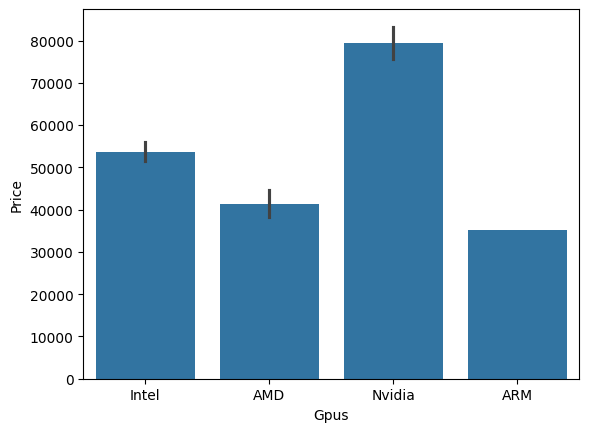

In [42]:
#price variation in relation with Gpu
sns.barplot(x=df['Gpus'],y=df['Price'])
#droping useless column
df = df.drop(columns=['Gpu'])
df.head()

In [43]:
#analyzing os system
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


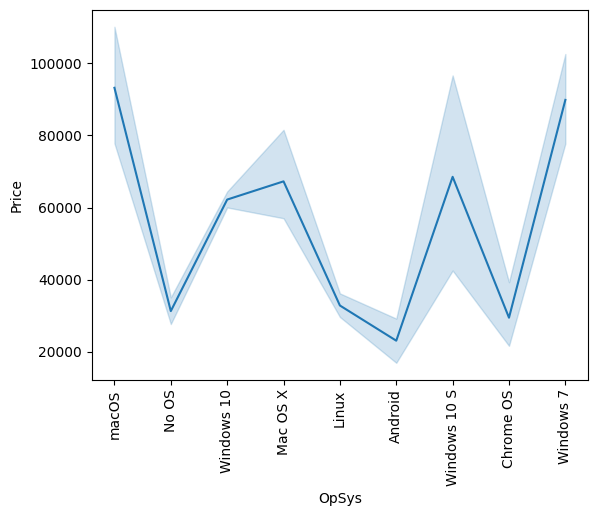

In [44]:
#checking the price relation of os and price
sns.lineplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [45]:
#categorizing os into three of its main types (Windows,linux or chromeos and others,macos)
def os(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    else:
        return 'Linux,Chromeos or none'
df['OpSys'] = df['OpSys'].apply(lambda x:os(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touch,Ips,Pixels,Cpu_Brand,Gpus
0,Apple,Ultrabook,8.0,Mac,1.37,71378.6832,0,0,788403008.0,Intel Core i5,Intel
1,Apple,Ultrabook,8.0,Mac,1.34,47895.5232,0,0,140318800.0,Intel Core i5,Intel
2,HP,Notebook,8.0,"Linux,Chromeos or none",1.86,30636.0000,0,0,255212304.0,Intel Core i5,Intel
3,Apple,Ultrabook,16.0,Mac,1.83,135195.3360,0,0,969475328.0,Intel Core i7,AMD
4,Apple,Ultrabook,8.0,Mac,1.37,96095.8080,0,0,788403008.0,Intel Core i5,Intel


<Axes: xlabel='Weight', ylabel='Price'>

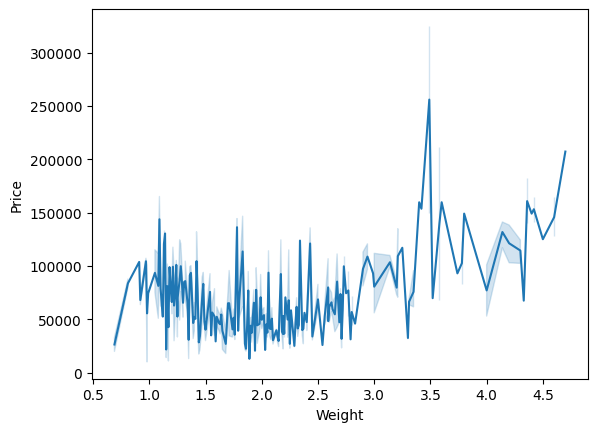

In [46]:
#analyzing weight column
sns.lineplot(x=df['Weight'],y=df['Price'])
#this shows weight is effecting only for gaming , heavy workstation and proffesional laptops

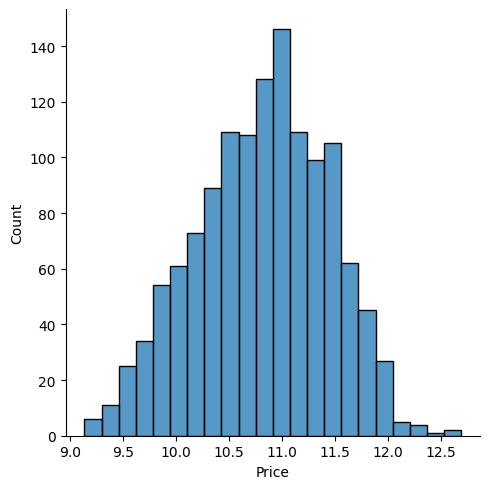

In [47]:
#ploting price graph here,gauss graph is obtained via np.log
sns.displot(np.log(df['Price']))

### Model Building and Training

In [48]:
#import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [49]:
# Assuming 'Price' is the target variable
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

X_train.shape, X_test.shape
mapper = {i: value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touch',
 6: 'Ips',
 7: 'Pixels',
 8: 'Cpu_Brand',
 9: 'Gpus'}

## Random Forest model

In [51]:
# Modify the ColumnTransformer to include the 'Cpu_Brand' column for encoding
# Assuming 'Cpu_Brand' is at index 2 in your dataframe, adjust the index if necessary
# Get the index of the 'Cpu_Brand' column
cpu_brand_index = X_train.columns.get_loc('Cpu_Brand')

step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),
                                    [0,1, cpu_brand_index ,3,7,9])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))

R2 score 0.8206781589093974


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
import pickle

# Saving the trained pipeline to a pickle file
with open('laptop_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [53]:
# Load the trained model from the pickle file
with open('laptop_price_prediction_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# loaded_model to make predictions
# For example:
predictions = loaded_model.predict(X_test)

predictions

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([ 45799.3256736 ,  19600.72533698, 109913.14354005,  94836.3061153 ,
       111577.20062439,  43348.16374726,  57691.08852684,  70299.60336   ,
        21326.3131392 ,  49710.88243994,  20043.782052  ,  59016.7520832 ,
        87054.5082432 ,  66153.93328064,  62332.06615843,  59180.719152  ,
        60048.95714992,  52225.20281041,  24652.78767575,  54928.40496762,
        86883.61347147, 114485.68336824,  15571.25668663,  30812.367456  ,
        29900.80758646, 101892.73414138,  58253.7490352 ,  25456.43905039,
        31527.31300114,  50363.280528  ,  30221.71914311,  21034.790718  ,
        13463.107416  ,  56662.87796607,  81602.99839706,  27981.57736392,
        72488.35640396,  48794.05932   ,  64306.05893889, 112174.2895542 ,
        76658.63227884,  36458.34209298,  41037.98453306, 109465.6031172 ,
        96962.028912  ,  34625.94581913,  49320.63022114,  32350.987296  ,
        24194.65545199,  17832.30720983,  49026.32985215,  30268.40574   ,
        79756.5982718 ,  

In [54]:
import joblib
from sklearn.preprocessing import LabelEncoder

# example: create and fit the encoder
le_typename = LabelEncoder()
le_typename.fit(df['TypeName'])  # This line requires 'df' to be defined
le_cpu = LabelEncoder()
le_cpu.fit(df['Cpu_Brand'])     # This line requires 'df' to be defined
le_gpu = LabelEncoder()
le_gpu.fit(df['Gpus'])          # This line requires 'df' to be defined
le_opsys = LabelEncoder()
le_opsys.fit(df['OpSys'])       # This line requires 'df' to be defined

# TypeName encoder
joblib.dump(le_typename, 'le_typename.pkl')

# Cpu_Brand encoder
joblib.dump(le_cpu, 'le_cpu.pkl')

# Gpu_Brand encoder
joblib.dump(le_gpu, 'le_gpu.pkl')

# OpSys encoder
joblib.dump(le_opsys, 'le_opsys.pkl')


['le_opsys.pkl']